In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)

from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K

# Todo: At some point it might be useful to use another framework like Pytorch and see how that compares to Tensorflow.

In [22]:
m = keras.models.load_model('dermatology-classification.sm')


In [27]:
x_train_mean = 161.28711564891134

In [28]:
x_train_std = 42.5734357892183

In [37]:
dict_classes = {
    0: 'Actinic keratose',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Melanoma',
    6: 'Vascular lesions'
}

Row
    [0] Column(width=500)
        [0] FileInput(accept='image/*')
        [1] Markdown(str, width=500)
    [1] JPG(str, width=500)
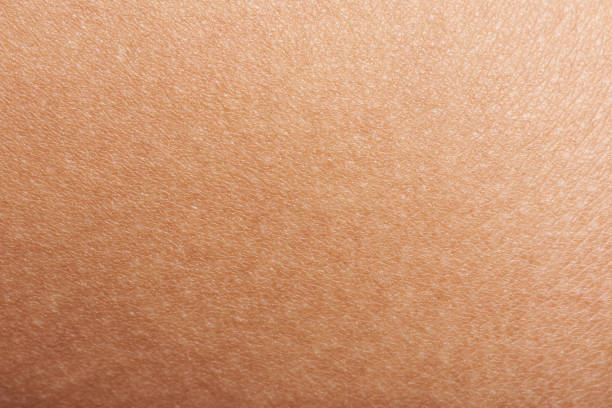

In [38]:
import panel as pn
from io import BytesIO

pn.extension()
file_input = pn.widgets.FileInput(accept='image/*')

pn_img = pn.pane.JPG('https://media.istockphoto.com/photos/skin-of-woman-hand-picture-id638453120?k=6&m=638453120&s=612x612&w=0&h=KtJYx2KOuhh7C6SmdLvtLK76vxDp4nJp6r0mW_9Hj9c=', width=500)
                     #https://daily.pokecommunity.com/wp-content/uploads/2016/07/pikachu-sandshrew-pokemon.jpg', width=500)
pn_text = pn.pane.Markdown('', width=500)

@pn.depends(file_input, watch=True)
def classify(image):
    if image:
        pn_img.object = BytesIO(image)
        img = Image.open(BytesIO(image)).resize((100,75))
        img_array = np.asarray(img)
        img_array = img_array.reshape(1, 75, 100, 3)
        img_array = (img_array - x_train_mean)/x_train_std
        clazz = np.argmax(m.predict(img_array))
        class_name = dict_classes[clazz]
        pn_text.object = '# ' + class_name + ' (' + str(clazz) + ')'
    
pn.Row(pn.Column(file_input, pn_text, width=500), pn_img).servable()